In [1]:
import THONKtools as THONK
import numpy as np
import pandas as pd
from uncertainties import ufloat
from uncertainties import unumpy as unp
import matplotlib.pylab as plt

In [2]:
data=pd.read_csv('measurements1',delimiter='\t',index_col=None)

In [3]:
data

,9.7,2266
0,12.7,2266
1,16.7,2265
2,20.2,2265
3,26.9,2261
4,27.8,2261
5,34.3,2260
6,35.5,2260


In [4]:
import numpy as np

with open ('measurements1','r') as myfile:
    dat=myfile.read().replace(',','.').replace('\n',',').replace('	',',')

datarray = dat.split(',')
array = np.array([float(i) for i in datarray[:-1]])

In [5]:
print(array)

[   9.7 2266.    12.7 2266.    16.7 2265.    20.2 2265.    26.9 2261.
   27.8 2261.    34.3 2260.    35.5 2260. ]


In [6]:
high=unp.uarray(array[0::4],0.5)
f=unp.uarray(array[1::4],0.5)
low=unp.uarray(array[2::4],0.5)

In [7]:
highn=unp.uarray([high[0].n-high[0].n,high[1].n-high[0].n,high[2].n-high[1].n,high[3].n-high[2].n],0.5)[1:]
lown=unp.uarray([low[0].n-low[0].n,low[1].n-low[0].n,low[2].n-low[1].n,low[3].n-low[2].n],0.5)[1:]
print(highn)
print(lown)

[7.0+/-0.5 10.2+/-0.5 7.399999999999999+/-0.5]
[7.5+/-0.5 7.600000000000001+/-0.5 7.699999999999999+/-0.5]


In [8]:
#THONK.linreg(data.height,data.frequency)
#plt.show()

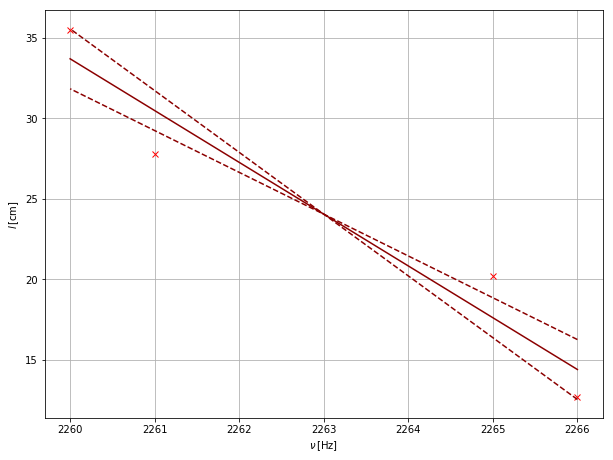

In [43]:
#plt.plot(unp.nominal_values(f[1:]),unp.nominal_values(highn),'x',color='lightblue')
#THONK.linreg(unp.nominal_values(f[1:]),unp.nominal_values(highn),color='blue')
#a1=THONK.a(unp.nominal_values(f[1:]),unp.nominal_values(highn))
plt.plot(unp.nominal_values(f),unp.nominal_values(low),'x',color='red')
THONK.linreg(unp.nominal_values(f),unp.nominal_values(low),color='darkred')
a2=THONK.a(unp.nominal_values(f),unp.nominal_values(low))
plt.grid()

fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=7.5
plt.rcParams["figure.figsize"]=fig_size
plt.xlabel(r'$\nu\,[\mathrm{Hz}]$')
plt.ylabel(r'$l\,[\mathrm{cm}]$')

plt.savefig(fname='1',dpi=300)


plt.show()

In [10]:
streuungh=np.std(unp.nominal_values(high))
streuungl=np.std(unp.nominal_values(low))
streuungf=np.std(unp.nominal_values(f))
print(streuungh)
print(streuungl)
print(streuungf)

9.415943925066673
8.497205422961128
2.5495097567963922


#### Aus Steigung Wellenlaenge bestimmen

In [11]:
print(f**(-1)*33000)

[14.563106796116505+/-0.0032133951447741627
 14.56953642384106+/-0.0032162332061459295
 14.5953118089341+/-0.003227623133333503
 14.601769911504425+/-0.003230480068916908]


In [12]:
k=np.linspace(0,3,3)
def lam(l,k):
    return 4*l/(2*k+1)
print(lam(lown*2,k))

[60.0+/-4.0 15.200000000000003+/-1.0
 8.799999999999999+/-0.5714285714285714]


In [13]:
print(f[1:]*lown*2)
print('Streuung:',np.std(unp.nominal_values(f[1:]*lown*2)))
print('Mittelwert:',THONK.mean(f[1:]*lown*2))
print('t=',THONK.t(THONK.mean(f[1:]*lown*2),ufloat(34300,0)))

[33975.0+/-2265.0124171845064 34367.200000000004+/-2261.012773073164
 34804.0+/-2260.0131172185706]
Streuung: 338.6010566367971
Mittelwert: (3.44+/-0.13)e+04
t= 0.06283942045247899


#### Abschaetzung

In [ ]:
sinf=f[1]
dsinf=

In [14]:
with open ('measurements2','r') as myfile:
    dat2=myfile.read().replace(',','.').replace('\n',',').replace('	',',')

datarray2 = dat2.split(',')
array2 = np.array([float(i) for i in datarray2[:-1]])

In [15]:
high2=unp.uarray(array2[0::4],0.5)
f2=unp.uarray(array2[1::4],0.5)
low2=unp.uarray(array2[2::4],0.5)

In [16]:
highn2=unp.uarray([high2[0].n-high2[0].n,high2[1].n-high2[0].n,high2[2].n-high2[1].n,high2[3].n-high2[2].n],0.5)[1:]
lown2=unp.uarray([low2[0].n-low2[0].n,low2[1].n-low2[0].n,low2[2].n-low2[1].n,low2[3].n-low2[2].n],0.5)[1:]
print(highn2)
print(lown2)

[2.9000000000000004+/-0.5 2.5+/-0.5 6.600000000000001+/-0.5]
[2.9000000000000004+/-0.5 3.9000000000000004+/-0.5 6.800000000000001+/-0.5]


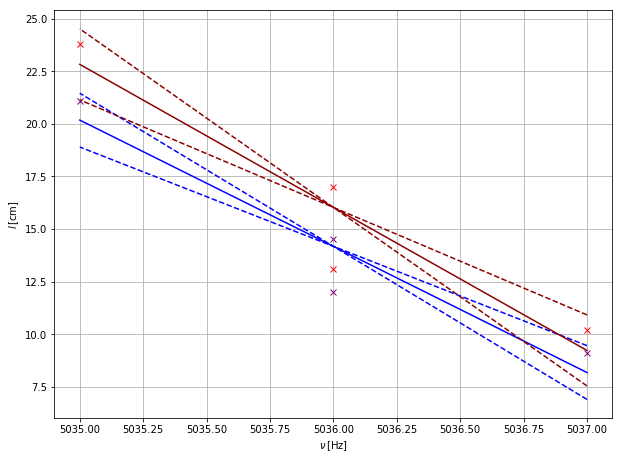

In [17]:
plt.plot(unp.nominal_values(f2),unp.nominal_values(high2),'x',color='purple')
THONK.linreg(unp.nominal_values(f2),unp.nominal_values(high2),color='blue')
a3=THONK.a(unp.nominal_values(f2),unp.nominal_values(high2))
plt.plot(unp.nominal_values(f2),unp.nominal_values(low2),'x',color='red')
THONK.linreg(unp.nominal_values(f2),unp.nominal_values(low2),color='darkred')
a4=THONK.a(unp.nominal_values(f2),unp.nominal_values(low2))
plt.grid()

fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=7.5
plt.rcParams["figure.figsize"]=fig_size
plt.xlabel(r'$\nu\,[\mathrm{Hz}]$')
plt.ylabel(r'$l\,[\mathrm{cm}]$')

plt.show()

In [18]:
print(f2[1:]*lown2*2)
print('Streuung:',np.std(unp.nominal_values(f2[1:]*lown2*2)))

[29208.800000000003+/-5036.000834988016 39280.8+/-5036.001510126859
 68476.0+/-5035.004591854907]
Streuung: 16652.386825517435


In [19]:
print(f2[1:]*highn2*2)
print('Streuung:',np.std(unp.nominal_values(f2[1:]*highn2*2)))

[29208.800000000003+/-5036.000834988016 25180.0+/-5036.000620532131
 66462.00000000001+/-5035.004325718102]
Streuung: 18583.85100528593


#### Streuung der Ergebnisse, Vergleich mit Abschaetzung fuer eine Frequenz aus Unsicherheit der Frequenzmessung und Wellenlaenge

## Part 3

In [20]:
with open ('part3measurements','r') as myfile:
    dat3=myfile.read().replace(',','.').replace('\n',',').replace('	',',')

datarray3 = dat3.split(',')
array3 = np.array([float(i) for i in datarray3[:-1]])

In [21]:
d=unp.uarray(array3[0::2],0.1)

t=unp.uarray(array3[1::2],100)*10**-6

f3=40367

print(d)
print(t)

[29.3+/-0.1 37.9+/-0.1 45.9+/-0.1 24.4+/-0.1 19.4+/-0.1]
[0.0024+/-9.999999999999999e-05
 0.0026999999999999997+/-9.999999999999999e-05
 0.0031999999999999997+/-9.999999999999999e-05
 0.002+/-9.999999999999999e-05 0.0018+/-9.999999999999999e-05]


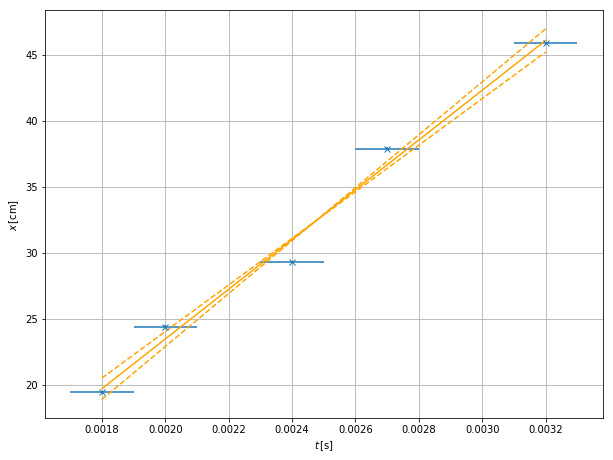

In [26]:
plt.errorbar(np.sort(unp.nominal_values(t)),np.sort(unp.nominal_values(d)),xerr=100*10**-6,yerr=0.1,fmt='x')
THONK.linreg(np.sort(unp.nominal_values(t)),np.sort(unp.nominal_values(d)),xnum=2)
plt.grid()

fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=7.5
plt.rcParams["figure.figsize"]=fig_size
plt.ylabel(r'$x\,[\mathrm{cm}]$')
plt.xlabel(r'$t\,[\mathrm{s}]$')

plt.show()

In [34]:
st=THONK.a(np.sort(unp.nominal_values(t)),np.sort(unp.nominal_values(d)))
print(st*2)

37743.589743589895


In [41]:
Dst=np.std(np.sort(unp.nominal_values(d)))
print(Dst)

9.485863165785178


In [42]:
print('t=',THONK.t(ufloat(st,Dst),ufloat(34300,0)))

t= 1626.4418807824966
